In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x '/content/drive/MyDrive/Cheating Detection/PersianPlagdet2016-text-alignment-corpus.rar'

In [ ]:
import os

folder_path = ['PersianPlagdet2016-text-alignment-train-corpus/src/', 'PersianPlagdet2016-text-alignment-train-corpus/susp/']

txt_files = []

for folder in folder_path:
  for root, dirs, files in os.walk(folder):
      for file in files:
          if file.endswith(".txt"):
              txt_files.append(os.path.join(root, file))

In [ ]:
len(txt_files)

3088

In [ ]:
import io


txt_collection = {}

for file in txt_files:
    with io.open(file, 'r', encoding='utf-8') as f:
        txt_collection[file] = f.read()

In [ ]:
#!pip install hazm

In [ ]:
from hazm import *
import tqdm

hazm_normalizer = Normalizer()

txt_sentences = {}
txt_norm_tokenize = {}

for file in tqdm.tqdm(txt_collection):

    normalized_txt = hazm_normalizer.normalize(txt_collection[file])
    sentences = sent_tokenize(normalized_txt)
    txt_sentences[file] = sentences
    temp = []

    for sent in sentences:
        temp += [word_tokenize(sent)]

    txt_norm_tokenize[file] = temp

100%|██████████| 3088/3088 [00:17<00:00, 172.21it/s]


In [ ]:
import pandas as pd

data = {}

for file in txt_norm_tokenize:
    data[file] =  str([str(inner_list) for inner_list in txt_norm_tokenize[file]])

df = pd.DataFrame.from_dict(data, orient='index', columns=['Content'])

df.reset_index(inplace=True)
df.columns = ['File Path', 'Content']

In [ ]:
df

,File Path,Content
0,PersianPlagdet2016-text-alignment-train-corpus...,"[""['مطابق', 'ماده', 'نهم', 'قانون', 'اساسی', '..."
1,PersianPlagdet2016-text-alignment-train-corpus...,"[""['بهشت', 'گمشده', 'نام', 'منطقه\\u200cای', '..."
2,PersianPlagdet2016-text-alignment-train-corpus...,"[""['گلشن', 'ابرار', 'مجموعه\\u200cای', 'متنوع'..."
3,PersianPlagdet2016-text-alignment-train-corpus...,"[""['راضیه', 'غلامی', 'شعبانی', '(', '۳۰', 'ارد..."
4,PersianPlagdet2016-text-alignment-train-corpus...,"[""['معماری', 'سبز', '(', 'به', 'انگلیسی', ':',..."
...,...,...
3083,PersianPlagdet2016-text-alignment-train-corpus...,"[""['اهورایی', 'زرتشتی\\u200cهای', 'اهورایی', '..."
3084,PersianPlagdet2016-text-alignment-train-corpus...,"[""['جنگ', 'صافی\\u200cرود', 'دومین', 'نبرد', '..."
3085,PersianPlagdet2016-text-alignment-train-corpus...,"[""['پل', 'ساروق', 'مربوط', 'به', 'دوره', 'صفوی..."
3086,PersianPlagdet2016-text-alignment-train-corpus...,"[""['عبدالله', 'سوری', 'معروف', 'به', 'ماموستا'..."


In [ ]:
import codecs

stop_path = 'persian_stopwords.txt'
stopwords = [hazm_normalizer.normalize(x.strip()) for x in codecs.open(stop_path,'r','utf-8').readlines()]

In [ ]:
all_tokens_nonstop = {}

for file in tqdm.tqdm(txt_norm_tokenize):
    temp = []
    for token_list in txt_norm_tokenize[file]:
        temp += [t for t in token_list if t not in stopwords]
    all_tokens_nonstop[file] = temp

100%|██████████| 3088/3088 [00:17<00:00, 171.78it/s]


In [ ]:
all_tokens_nonstop[txt_files[0]]

['مطابق',
 'ماده',
 'نهم',
 'قانون',
 'اساسی',
 'افغانستان',
 'دولت',
 'جمهوری',
 'اسلامی',
 'افغانستان',
 'مالکیت',
 'معادن',
 'منابع',
 'طبیعی',
 'افغانستان',
 'وزارت',
 'معادن',
 'عنوان',
 'وزارت',
 'کلیدی',
 'سکتوری',
 'عرصه\u200cهای',
 'تفحص',
 'اکتشاف',
 'انکشاف',
 'استخراج',
 'پروسس',
 'منرال\u200cها',
 'هایدروکاربن\u200cها',
 'فعالیت',
 'می\u200cنماید',
 'وزارت',
 'معادن',
 'مسئولیت',
 'حراست',
 'مالکیت',
 'حمل',
 'ونقل',
 'بازاریابی',
 'منابع',
 'طبیعی',
 'مطابق',
 'قانون',
 'منرال\u200cها',
 'هایدروکاربن\u200cها',
 '۱',
 'درحال',
 'حاضر',
 'وحیدالله',
 'شهرانی',
 'وزیر',
 'معادن',
 'افغانستان',
 '۲',
 'افغانستان',
 'منابع',
 'وسیع',
 'طبیعی',
 'ذخایر',
 'هنگفت',
 'مس',
 'آهن',
 'ذغال',
 'سنگ',
 'مرمر',
 'فلزات',
 'نجیبه',
 'سنگ\u200cهای',
 'قیمتی',
 'هایدروکاربن\u200cها',
 'منابع',
 'افغانستان',
 'دست',
 'ناخورده',
 'باقی',
 'مانده',
 'انکشاف',
 'چندانی',
 'نکرده_است',
 'ثباتی',
 'درازمدت',
 'گردیده',
 'معدنکاری',
 'صورت',
 'وسیع',
 'صورت',
 'نگیرد',
 'جهت',
 'انکشاف',
 'تلاش

In [ ]:
lemmatizer = Lemmatizer()


lem_tokens = {}

for file in tqdm.tqdm(all_tokens_nonstop):
    temp = []
    for token in all_tokens_nonstop[file]:

        token = token.replace("#", "").replace("-", "").replace("_", "")
        temp += [lemmatizer.lemmatize(token)]

    lem_tokens[file] = temp

100%|██████████| 3088/3088 [00:04<00:00, 641.23it/s]


In [ ]:
lem_tokens[txt_files[0]]

['مطابق',
 'ماده',
 'نهم',
 'قانون',
 'اساس',
 'افغانستان',
 'دولت',
 'جمهوری',
 'اسلام',
 'افغانستان',
 'مالکیت',
 'معادن',
 'منابع',
 'طبیعی',
 'افغانستان',
 'وزارت',
 'معادن',
 'عنوان',
 'وزارت',
 'کلیدی',
 'سکتور',
 'عرصه',
 'تفحص',
 'اکتشاف',
 'انکشاف',
 'استخراج',
 'پروسس',
 'منرال\u200cها',
 'هایدروکاربن\u200cها',
 'فعالیت',
 'نمود#نما',
 'وزارت',
 'معادن',
 'مسئولیت',
 'حراست',
 'مالکیت',
 'حمل',
 'ونقل',
 'بازاریابی',
 'منابع',
 'طبیعی',
 'مطابق',
 'قانون',
 'منرال\u200cها',
 'هایدروکاربن\u200cها',
 '۱',
 'درحال',
 'حاضر',
 'وحیدالله',
 'شهران',
 'وزیر',
 'معادن',
 'افغانستان',
 '۲',
 'افغانستان',
 'منابع',
 'وسیع',
 'طبیعی',
 'ذخایر',
 'هنگفت',
 'مس',
 'آهن',
 'ذغال',
 'سنگ',
 'مرمر',
 'فلزات',
 'نجیبه',
 'سنگ',
 'قیمت',
 'هایدروکاربن\u200cها',
 'منابع',
 'افغانستان',
 'دست',
 'ناخورده',
 'باقی',
 'مانده',
 'انکشاف',
 'چندان',
 'نکردهاست',
 'ثبات',
 'درازمدت',
 'گردیده',
 'معدنکاری',
 'صورت',
 'وسیع',
 'صورت',
 'گرفت#گیر',
 'جهت',
 'انکشاف',
 'تلاش',
 'اندک',
 'صورت',
 'تلاش'

In [ ]:
from nltk import FreqDist
import itertools
import pandas as pd

freq_all_tokens = {}

for file in tqdm.tqdm(lem_tokens):
    freq_all_tokens[file] = FreqDist(list(itertools.chain(itertools.chain(lem_tokens[file]))))

 12%|█▏        | 369/3088 [00:00<00:03, 770.21it/s] 

100%|██████████| 3088/3088 [00:02<00:00, 1407.37it/s]


In [ ]:
freq_all_tokens[txt_files[0]]

FreqDist({'افغانستان': 36, 'سال': 33, 'معادن': 32, 'وزارت': 23, 'منابع': 21, 'انکشاف': 19, 'تصدی': 18, 'اکتشاف': 17, 'گشت#گرد': 17, 'معدن': 16, ...})

F1 Feature

In [ ]:
F1 = {}

for file in freq_all_tokens:
    counter_f1 = 0
    counter_all = 0
    for token in freq_all_tokens[file]:
        counter_all += 1
        if freq_all_tokens[file][token] == 1:
            counter_f1 += 1

    F1[file] = counter_f1/counter_all

In [ ]:
F1[txt_files[0]]

0.5955223880597015

F2 Feature

In [ ]:
from collections import defaultdict
import operator


word_frequencies = defaultdict(int)

for file in freq_all_tokens:

    item = freq_all_tokens[file]
    for word, frequency in item.items():
        word_frequencies[word] += frequency

sorted_frequencies = sorted(word_frequencies.items(), key=operator.itemgetter(1), reverse=True)

top_15_words = [item[0] for item in sorted_frequencies[:15]]

print(top_15_words)

['سال', 'ایران', 'نام', 'شهر', 'تهران', 'کتاب', 'اسلام', 'قرار', 'دانشگاه', 'کار', 'کشور', 'زمان', 'عنوان', 'تاریخ', '۱']


In [ ]:
sorted_frequencies

[('سال', 15882),
 ('ایران', 15820),
 ('نام', 5912),
 ('شهر', 5470),
 ('تهران', 5257),
 ('کتاب', 5050),
 ('اسلام', 4883),
 ('قرار', 4703),
 ('دانشگاه', 4645),
 ('کار', 4622),
 ('کشور', 4593),
 ('زمان', 4384),
 ('عنوان', 4356),
 ('تاریخ', 4314),
 ('۱', 4039),
 ('روز', 4019),
 ('شاه', 3867),
 ('دوره', 3834),
 ('۲', 3700),
 ('مردم', 3615),
 ('دست', 3563),
 ('محمد', 3560),
 ('دولت', 3328),
 ('توسط', 3296),
 ('زبان', 3208),
 ('۳', 3146),
 ('صورت', 3131),
 ('گشت#گرد', 3129),
 ('استفاده', 3116),
 ('فارس', 3047),
 ('فرهنگ', 2946),
 ('علی', 2922),
 ('فعالیت', 2825),
 ('سازمان', 2775),
 ('ماه', 2659),
 ('گروه', 2621),
 ('ملی', 2596),
 ('مجلس', 2580),
 ('۴', 2544),
 ('آثار', 2502),
 ('خان', 2463),
 ('شد#شو', 2427),
 ('شرکت', 2415),
 ('منطقه', 2388),
 ('آب', 2345),
 ('بنا', 2313),
 ('سید', 2296),
 ('انقلاب', 2265),
 ('جمله', 2258),
 ('کرد#کن', 2229),
 ('آغاز', 2226),
 ('زندگی', 2214),
 ('انجام', 2211),
 ('۵', 2197),
 ('شده\u200cاست', 2172),
 ('علم', 2144),
 ('اصل', 2140),
 ('آموزش', 2137),
 ('هنر',

In [ ]:
F2 = {}

for file in freq_all_tokens:
    F2[file] = {}

    for w in top_15_words:
        F2[file][w] = freq_all_tokens[file][w] / len(freq_all_tokens[file])

In [ ]:
F2[txt_files[0]]

{'سال': 0.049253731343283584,
 'ایران': 0.0,
 'نام': 0.0,
 'شهر': 0.0014925373134328358,
 'تهران': 0.0,
 'کتاب': 0.0,
 'اسلام': 0.0014925373134328358,
 'قرار': 0.007462686567164179,
 'دانشگاه': 0.0,
 'کار': 0.008955223880597015,
 'کشور': 0.010447761194029851,
 'زمان': 0.005970149253731343,
 'عنوان': 0.007462686567164179,
 'تاریخ': 0.0,
 '۱': 0.005970149253731343}

F3 Feature

In [ ]:
F3_1 = {}
F3_2 = {}
F3_3 = {}


for file in txt_sentences:
    temp = []
    for sent in txt_sentences[file]:
        temp += [len(sent)]

    average = sum(temp) / len(temp)
    counter_low = 0
    counter_up = 0

    for i in range(len(temp)):
        if temp[i] > average:
            counter_up += 1
        elif temp[i] < average:
            counter_low += 1

    F3_1[file] = average
    F3_2[file] = counter_up / len(temp)
    F3_3[file] = counter_low / len(temp)

In [ ]:
F3_1[txt_files[0]]

151.0

In [ ]:
F3_2[txt_files[0]]

0.3977272727272727

In [ ]:
F3_3[txt_files[0]]

0.5909090909090909

In [ ]:
t = []

for file in txt_sentences:
    for sent in txt_sentences[file]:
        t += [len(sent)]

minimum_threshold = sorted(t)[int(len(t)*0.1)]
maximum_threshold = sorted(t)[int(len(t)*0.9)]

In [ ]:
minimum_threshold

41

In [ ]:
maximum_threshold

243

In [ ]:
F3_4 = {}
F3_5 = {}
F3_6 = {}
F3_7 = {}
F3_8 = {}
F3_9 = {}


for file in txt_sentences:
    temp = []
    for sent in txt_sentences[file]:
        temp += [len(sent)]

    average = sum(temp) / len(temp)
    counter_f3_4 = 0
    counter_f3_5 = 0
    counter_f3_6 = 0
    counter_f3_7 = 0

    for i in range(len(temp)):
        if temp[i] > maximum_threshold:
            counter_f3_4 += 1

        if temp[i] < minimum_threshold:
            counter_f3_5 += 1

        if average < temp[i] < maximum_threshold:
            counter_f3_6 += 1

        if minimum_threshold < temp[i] < average:
            counter_f3_7 += 1


    F3_4[file] = counter_f3_4 / len(temp)
    F3_5[file] = counter_f3_5 / len(temp)
    F3_6[file] = counter_f3_6 / len(temp)
    F3_7[file] = counter_f3_7 / len(temp)
    F3_8[file] = max(temp)
    F3_9[file] = min(temp)

In [ ]:
F3_4[txt_files[0]]

0.125

In [ ]:
F3_5[txt_files[0]]

0.011363636363636364

In [ ]:
F3_6[txt_files[0]]

0.2727272727272727

In [ ]:
F3_7[txt_files[0]]

0.5795454545454546

In [ ]:
F3_8[txt_files[0]]

345

In [ ]:
F3_9[txt_files[0]]

3

F4 Feature

In [ ]:
#!wget https://github.com/language-ml/course-nlp-ir-1-text-exploring/raw/main/resources/postagger.model

In [ ]:
tagger = POSTagger(model='postagger.model')

In [ ]:
F4 = {}

tag_list = ['N', 'Ne', 'V', 'AJ', 'AJe', 'ADV', 'ADVe', 'PRO', 'PROe', 'DET', 'DETe', 'P', 'Pe', 'POSTP', 'NUM', 'NUMe', 'CONJ', 'CONJe', 'PUNC', 'CL', 'INT', 'RES', 'RESe']

for file in tqdm.tqdm(txt_sentences):

    F4[file] = {}

    for tag in tag_list:
        F4[file][tag] = 0

    for sent in txt_sentences[file]:

        temp = {}
        for tag in tag_list:
            temp[tag] = 0

        sent_pos = tagger.tag(word_tokenize(sent))
        for pos in sent_pos:
            temp[pos[1]] += 1

        for tag in tag_list:
            F4[file][tag] += temp[tag] / len(sent_pos)

100%|██████████| 3088/3088 [02:34<00:00, 19.95it/s]


In [ ]:
F4[txt_files[0]]

{'N': 18.083567463603938,
 'Ne': 19.155546110292864,
 'V': 6.547396992417617,
 'AJ': 6.489699189251111,
 'AJe': 2.731010510607732,
 'ADV': 1.1143342551587352,
 'ADVe': 0.0,
 'PRO': 0.7309130562048384,
 'PROe': 0.0,
 'DET': 1.3208326365972936,
 'DETe': 0.11018518518518519,
 'P': 7.902351075009476,
 'Pe': 1.4923838292742693,
 'POSTP': 1.2475424636425563,
 'NUM': 4.17670784126517,
 'NUMe': 0.5104304725933841,
 'CONJ': 5.965246553009883,
 'CONJe': 0.07142857142857142,
 'PUNC': 9.574086879767302,
 'CL': 0.6641215937790848,
 'INT': 0.0,
 'RES': 0.08840579710144927,
 'RESe': 0.023809523809523808}

F5 Feature

In [ ]:
F5 = {}

couple_tag_list = []
for i in tag_list:
    for j in tag_list:
        temp = i + '_' + j
        if temp not in couple_tag_list:
            couple_tag_list += [temp]

for file in tqdm.tqdm(txt_sentences):

    F5[file] = {}

    for tag in couple_tag_list:
        F5[file][tag] = 0

    for sent in txt_sentences[file]:

        temp = {}
        for tag in couple_tag_list:
            temp[tag] = 0

        sent_pos = tagger.tag(word_tokenize(sent))
        for idx in range(len(sent_pos)-1):
            temp[sent_pos[idx][1] + '_' + sent_pos[idx+1][1]] += 1

        for tag in couple_tag_list:
            F5[file][tag] += temp[tag] / len(sent_pos)

100%|██████████| 3088/3088 [03:51<00:00, 13.31it/s]


In [ ]:
F5[txt_files[0]]

{'N_N': 1.8076662257506086,
 'N_Ne': 1.3010156903002994,
 'N_V': 4.404607160782129,
 'N_AJ': 0.3921325399015403,
 'N_AJe': 0.180936584279901,
 'N_ADV': 0.4487280089901573,
 'N_ADVe': 0.0,
 'N_PRO': 0.0,
 'N_PROe': 0.0,
 'N_DET': 0.057692307692307696,
 'N_DETe': 0.0,
 'N_P': 3.0529371527493327,
 'N_Pe': 0.7133838575580489,
 'N_POSTP': 0.6630250334866118,
 'N_NUM': 0.18872895973353954,
 'N_NUMe': 0.0,
 'N_CONJ': 2.9393052898136083,
 'N_CONJe': 0.0,
 'N_PUNC': 1.9334086525658538,
 'N_CL': 0.0,
 'N_INT': 0.0,
 'N_RES': 0.0,
 'N_RESe': 0.0,
 'Ne_N': 5.391315458883198,
 'Ne_Ne': 4.5382308097158806,
 'Ne_V': 0.0,
 'Ne_AJ': 4.617563060104284,
 'Ne_AJe': 1.9033996223709184,
 'Ne_ADV': 0.1517918936512831,
 'Ne_ADVe': 0.0,
 'Ne_PRO': 0.4486712548768435,
 'Ne_PROe': 0.0,
 'Ne_DET': 0.4113721211343239,
 'Ne_DETe': 0.05,
 'Ne_P': 0.017857142857142856,
 'Ne_Pe': 0.07887926337583087,
 'Ne_POSTP': 0.0,
 'Ne_NUM': 1.0223704144564894,
 'Ne_NUMe': 0.4669522117238189,
 'Ne_CONJ': 0.0,
 'Ne_CONJe': 0.0,
 'N

In [ ]:
F6 = {}
F7 = {}


tag_list = ['N', 'Ne', 'V', 'AJ', 'AJe', 'ADV', 'ADVe', 'PRO', 'PROe', 'DET', 'DETe', 'P', 'Pe', 'POSTP', 'NUM', 'NUMe', 'CONJ', 'CONJe', 'PUNC', 'CL', 'INT', 'RES', 'RESe']

for file in tqdm.tqdm(txt_sentences):

    F6[file] = {}
    F7[file] = {}

    for tag in tag_list:
        F6[file][tag] = 0
        F7[file][tag] = 0

    first_sent_pos = tagger.tag(word_tokenize(txt_sentences[file][0]))
    for pos in first_sent_pos:
        F6[file][pos[1]] += 1

    last_sent_pos = tagger.tag(word_tokenize(txt_sentences[file][-1]))
    for pos in last_sent_pos:
        F7[file][pos[1]] += 1

    for tag in tag_list:
        F6[file][tag] /= len(txt_sentences[file])
        F7[file][tag] /= len(txt_sentences[file])

100%|██████████| 3088/3088 [00:34<00:00, 88.34it/s] 


In [ ]:
F6[txt_files[0]]

{'N': 0.045454545454545456,
 'Ne': 0.07954545454545454,
 'V': 0.011363636363636364,
 'AJ': 0.011363636363636364,
 'AJe': 0.03409090909090909,
 'ADV': 0.0,
 'ADVe': 0.0,
 'PRO': 0.0,
 'PROe': 0.0,
 'DET': 0.0,
 'DETe': 0.0,
 'P': 0.011363636363636364,
 'Pe': 0.0,
 'POSTP': 0.011363636363636364,
 'NUM': 0.0,
 'NUMe': 0.011363636363636364,
 'CONJ': 0.011363636363636364,
 'CONJe': 0.0,
 'PUNC': 0.022727272727272728,
 'CL': 0.0,
 'INT': 0.0,
 'RES': 0.0,
 'RESe': 0.0}

In [ ]:
F7[txt_files[0]]

{'N': 0.0,
 'Ne': 0.0,
 'V': 0.0,
 'AJ': 0.0,
 'AJe': 0.0,
 'ADV': 0.0,
 'ADVe': 0.0,
 'PRO': 0.0,
 'PROe': 0.0,
 'DET': 0.0,
 'DETe': 0.0,
 'P': 0.0,
 'Pe': 0.0,
 'POSTP': 0.0,
 'NUM': 0.011363636363636364,
 'NUMe': 0.0,
 'CONJ': 0.0,
 'CONJe': 0.0,
 'PUNC': 0.022727272727272728,
 'CL': 0.0,
 'INT': 0.0,
 'RES': 0.0,
 'RESe': 0.0}

In [ ]:
data_dict = {'path': [], 'F1': [], 'F3_1': [], 'F3_2': [], 'F3_3': [], 'F3_4': [], 'F3_5': [], 'F3_6': [], 'F3_7': [], 'F3_8': [], 'F3_9': []}

for file in txt_files:
    data_dict['path'] += [file]
    data_dict['F1'] += [F1[file]]
    data_dict['F3_1'] += [F3_1[file]]
    data_dict['F3_2'] += [F3_2[file]]
    data_dict['F3_3'] += [F3_3[file]]
    data_dict['F3_4'] += [F3_4[file]]
    data_dict['F3_5'] += [F3_5[file]]
    data_dict['F3_6'] += [F3_6[file]]
    data_dict['F3_7'] += [F3_7[file]]
    data_dict['F3_8'] += [F3_8[file]]
    data_dict['F3_9'] += [F3_9[file]]

    for tag in F2[file]:
        if ('F2_' + tag) not in data_dict:
            data_dict['F2_' + tag] = [F2[file][tag]]
        else:
            data_dict['F2_' + tag] += [F2[file][tag]]

    for tag in F4[file]:
        if ('F4_' + tag) not in data_dict:
            data_dict['F4_' + tag] = [F4[file][tag]]
        else:
            data_dict['F4_' + tag] += [F4[file][tag]]

    for tag in F5[file]:
        if ('F5_' + tag) not in data_dict:
            data_dict['F5_' + tag] = [F5[file][tag]]
        else:
            data_dict['F5_' + tag] += [F5[file][tag]]

    for tag in F6[file]:
        if ('F6_' + tag) not in data_dict:
            data_dict['F6_' + tag] = [F6[file][tag]]
        else:
            data_dict['F6_' + tag] += [F6[file][tag]]

    for tag in F7[file]:
        if ('F7_' + tag) not in data_dict:
            data_dict['F7_' + tag] = [F7[file][tag]]
        else:
            data_dict['F7_' + tag] += [F7[file][tag]]

    if 'Label' not in data_dict:
        data_dict['Label'] = []

    if '/src/' in file:
        data_dict['Label'] += [0]
    elif '/susp/' in file:
        data_dict['Label'] += [1]

In [ ]:
import pandas as pd

df = pd.DataFrame(data_dict)

In [ ]:
df

,path,F1,F3_1,F3_2,F3_3,F3_4,F3_5,F3_6,F3_7,F3_8,...,F7_NUM,F7_NUMe,F7_CONJ,F7_CONJe,F7_PUNC,F7_CL,F7_INT,F7_RES,F7_RESe,Label
0,PersianPlagdet2016-text-alignment-train-corpus...,0.595522,151.000000,0.397727,0.590909,0.125000,0.011364,0.272727,0.579545,345,...,0.011364,0.0,0.0,0.0,0.022727,0.0,0.0,0.000000,0.0,0
1,PersianPlagdet2016-text-alignment-train-corpus...,0.774319,195.562500,0.250000,0.750000,0.187500,0.062500,0.062500,0.687500,741,...,0.062500,0.0,0.0,0.0,0.125000,0.0,0.0,0.000000,0.0,0
2,PersianPlagdet2016-text-alignment-train-corpus...,0.634750,71.363363,0.204204,0.795796,0.039039,0.513514,0.165165,0.264264,3348,...,0.000000,0.0,0.0,0.0,0.003003,0.0,0.0,0.000000,0.0,0
3,PersianPlagdet2016-text-alignment-train-corpus...,0.738806,138.769231,0.538462,0.461538,0.000000,0.076923,0.538462,0.384615,228,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0
4,PersianPlagdet2016-text-alignment-train-corpus...,0.653935,144.857143,0.420635,0.579365,0.111111,0.063492,0.301587,0.515873,432,...,0.015873,0.0,0.0,0.0,0.071429,0.0,0.0,0.007937,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,PersianPlagdet2016-text-alignment-train-corpus...,0.801802,197.600000,0.250000,0.750000,0.150000,0.400000,0.100000,0.350000,1968,...,0.000000,0.0,0.0,0.0,0.050000,0.0,0.0,0.000000,0.0,1
3084,PersianPlagdet2016-text-alignment-train-corpus...,0.712500,75.833333,0.400000,0.600000,0.000000,0.100000,0.400000,0.500000,145,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1
3085,PersianPlagdet2016-text-alignment-train-corpus...,0.732673,102.538462,0.538462,0.461538,0.000000,0.230769,0.538462,0.230769,221,...,0.076923,0.0,0.0,0.0,0.153846,0.0,0.0,0.000000,0.0,1
3086,PersianPlagdet2016-text-alignment-train-corpus...,0.752955,168.612903,0.387097,0.612903,0.161290,0.048387,0.225806,0.564516,667,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1


In [ ]:
df.to_csv('cheat.csv', index=False)

In [ ]:
import pandas as pd

# Load data from CSV file into a dataframe
df = pd.read_csv('/content/drive/MyDrive/Cheating Detection/cheat.csv')

In [ ]:
df

,path,F1,F3_1,F3_2,F3_3,F3_4,F3_5,F3_6,F3_7,F3_8,...,F7_NUM,F7_NUMe,F7_CONJ,F7_CONJe,F7_PUNC,F7_CL,F7_INT,F7_RES,F7_RESe,Label
0,PersianPlagdet2016-text-alignment-train-corpus...,0.595522,151.000000,0.397727,0.590909,0.125000,0.011364,0.272727,0.579545,345,...,0.011364,0.0,0.0,0.0,0.022727,0.0,0.0,0.000000,0.0,0
1,PersianPlagdet2016-text-alignment-train-corpus...,0.774319,195.562500,0.250000,0.750000,0.187500,0.062500,0.062500,0.687500,741,...,0.062500,0.0,0.0,0.0,0.125000,0.0,0.0,0.000000,0.0,0
2,PersianPlagdet2016-text-alignment-train-corpus...,0.634750,71.363363,0.204204,0.795796,0.039039,0.513514,0.165165,0.264264,3348,...,0.000000,0.0,0.0,0.0,0.003003,0.0,0.0,0.000000,0.0,0
3,PersianPlagdet2016-text-alignment-train-corpus...,0.738806,138.769231,0.538462,0.461538,0.000000,0.076923,0.538462,0.384615,228,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0
4,PersianPlagdet2016-text-alignment-train-corpus...,0.653935,144.857143,0.420635,0.579365,0.111111,0.063492,0.301587,0.515873,432,...,0.015873,0.0,0.0,0.0,0.071429,0.0,0.0,0.007937,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,PersianPlagdet2016-text-alignment-train-corpus...,0.801802,197.600000,0.250000,0.750000,0.150000,0.400000,0.100000,0.350000,1968,...,0.000000,0.0,0.0,0.0,0.050000,0.0,0.0,0.000000,0.0,1
3084,PersianPlagdet2016-text-alignment-train-corpus...,0.712500,75.833333,0.400000,0.600000,0.000000,0.100000,0.400000,0.500000,145,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1
3085,PersianPlagdet2016-text-alignment-train-corpus...,0.732673,102.538462,0.538462,0.461538,0.000000,0.230769,0.538462,0.230769,221,...,0.076923,0.0,0.0,0.0,0.153846,0.0,0.0,0.000000,0.0,1
3086,PersianPlagdet2016-text-alignment-train-corpus...,0.752955,168.612903,0.387097,0.612903,0.161290,0.048387,0.225806,0.564516,667,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1


<Axes: ylabel='Label'>

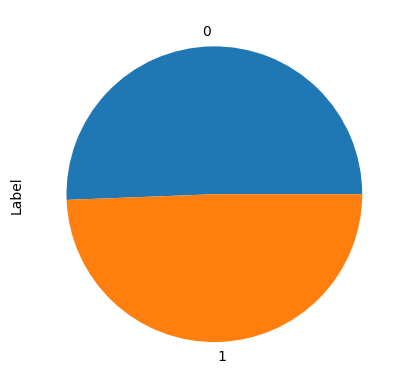

In [ ]:
plot_df = df.Label.value_counts()
plot_df.plot(kind="pie")

In [ ]:
plot_df

0    1563
1    1525
Name: Label, dtype: int64

In [ ]:
from sklearn.decomposition import PCA

features = df.iloc[:, 1:-1]
labels = df.iloc[:, -1]

pca = PCA(n_components=150)
df_pca = pca.fit_transform(features)

df_pca = pd.DataFrame(df_pca, columns=['PC' + str(i) for i in range(150)])

In [ ]:
df_pca

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149
0,-104.040498,22.966549,27.219742,15.864497,1.844296,-2.081100,5.080483,2.385903,0.688630,-0.404124,...,0.068338,-0.016380,-0.021726,0.111831,0.137229,-0.050465,-0.030895,0.075253,0.006902,0.119041
1,292.634682,-11.535094,20.883427,-15.416031,1.354967,-1.473260,2.302506,-0.491632,-0.028476,-0.899811,...,-0.025458,-0.025109,0.062749,0.015785,0.047766,-0.010515,-0.000133,-0.015501,-0.019072,-0.007333
2,2823.512687,-652.597676,-36.916668,89.079623,-9.664055,78.938526,13.757425,-6.904670,-42.435345,4.595808,...,-0.039356,0.045612,-0.052507,-0.014365,-0.029131,0.013080,0.001268,-0.015597,-0.045857,-0.039843
3,-221.261352,36.163026,19.424244,-10.375291,1.005153,-0.075442,-0.112000,-0.341907,-0.799962,-0.069633,...,0.014592,-0.046461,-0.000864,0.019207,0.004943,-0.018402,-0.002307,-0.026371,0.010084,-0.007086
4,-19.944157,-0.659839,26.565237,25.529635,1.615909,-6.412889,1.363146,1.968985,6.382654,-0.294211,...,-0.061263,0.065869,0.161677,-0.075507,0.148067,0.045222,0.015003,-0.034284,0.033373,0.027923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,1495.431383,-251.845525,-8.927530,-25.720246,-5.095621,1.254748,-3.093326,4.690654,-0.872966,-0.661661,...,0.059436,0.044705,-0.062237,-0.058334,-0.003320,-0.022351,0.018114,0.090207,0.013683,0.013696
3084,-315.020848,-7.853757,9.643619,-2.319057,-0.119915,-0.592320,-3.755309,0.826629,-1.906758,1.178630,...,-0.017980,-0.000762,0.101799,-0.028897,-0.032788,0.096462,0.098114,0.019164,-0.008562,0.093936
3085,-235.322901,2.796500,12.779544,-10.696000,-0.039809,0.595766,-0.902487,2.072094,0.379202,0.289719,...,-0.011319,-0.002885,-0.002169,-0.002363,-0.010061,-0.019707,0.021033,0.045925,-0.020483,0.007683
3086,214.907445,-23.532296,21.407657,3.683974,0.921150,-1.993068,1.701950,0.557480,-0.921172,-0.056368,...,-0.048444,0.009209,0.000655,-0.021163,0.000652,0.056269,0.065102,0.118263,0.045573,0.028897


In [ ]:
df_concatenated = pd.concat([df_pca, labels], axis=1)

In [ ]:
df_concatenated

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,Label
0,-104.040498,22.966549,27.219742,15.864497,1.844296,-2.081100,5.080483,2.385903,0.688630,-0.404124,...,-0.016380,-0.021726,0.111831,0.137229,-0.050465,-0.030895,0.075253,0.006902,0.119041,0
1,292.634682,-11.535094,20.883427,-15.416031,1.354967,-1.473260,2.302506,-0.491632,-0.028476,-0.899811,...,-0.025109,0.062749,0.015785,0.047766,-0.010515,-0.000133,-0.015501,-0.019072,-0.007333,0
2,2823.512687,-652.597676,-36.916668,89.079623,-9.664055,78.938526,13.757425,-6.904670,-42.435345,4.595808,...,0.045612,-0.052507,-0.014365,-0.029131,0.013080,0.001268,-0.015597,-0.045857,-0.039843,0
3,-221.261352,36.163026,19.424244,-10.375291,1.005153,-0.075442,-0.112000,-0.341907,-0.799962,-0.069633,...,-0.046461,-0.000864,0.019207,0.004943,-0.018402,-0.002307,-0.026371,0.010084,-0.007086,0
4,-19.944157,-0.659839,26.565237,25.529635,1.615909,-6.412889,1.363146,1.968985,6.382654,-0.294211,...,0.065869,0.161677,-0.075507,0.148067,0.045222,0.015003,-0.034284,0.033373,0.027923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,1495.431383,-251.845525,-8.927530,-25.720246,-5.095621,1.254748,-3.093326,4.690654,-0.872966,-0.661661,...,0.044705,-0.062237,-0.058334,-0.003320,-0.022351,0.018114,0.090207,0.013683,0.013696,1
3084,-315.020848,-7.853757,9.643619,-2.319057,-0.119915,-0.592320,-3.755309,0.826629,-1.906758,1.178630,...,-0.000762,0.101799,-0.028897,-0.032788,0.096462,0.098114,0.019164,-0.008562,0.093936,1
3085,-235.322901,2.796500,12.779544,-10.696000,-0.039809,0.595766,-0.902487,2.072094,0.379202,0.289719,...,-0.002885,-0.002169,-0.002363,-0.010061,-0.019707,0.021033,0.045925,-0.020483,0.007683,1
3086,214.907445,-23.532296,21.407657,3.683974,0.921150,-1.993068,1.701950,0.557480,-0.921172,-0.056368,...,0.009209,0.000655,-0.021163,0.000652,0.056269,0.065102,0.118263,0.045573,0.028897,1


In [ ]:
df_shuffled = df_concatenated.sample(frac=1)

In [ ]:
df_shuffled

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,Label
2928,14.489044,-17.771824,5.065179,-8.880600,1.170090,0.985915,-0.623890,0.956711,0.071261,1.238104,...,-0.013150,0.000892,-0.010799,-0.061064,-0.034083,0.044902,0.053202,-0.001911,-0.046441,1
2294,735.382849,-136.089611,-0.763475,-13.911530,-1.394479,-1.534103,-2.015058,1.022339,0.137061,-0.465387,...,-0.004418,-0.057621,0.061439,-0.021429,-0.011699,0.023691,0.005934,-0.012095,0.074400,1
2238,-171.721809,18.235901,19.753445,-2.557123,1.001651,-1.290834,-0.128326,0.233470,-1.568057,0.331736,...,0.059597,0.007357,0.026267,0.012413,-0.026539,-0.013825,-0.024025,-0.009180,0.025730,1
1267,-113.956803,7.393551,10.528660,-5.850660,0.383539,-0.352701,0.913504,1.027342,1.344491,-0.009946,...,0.023840,-0.050591,0.033257,0.006972,-0.017377,-0.064729,-0.007573,0.010433,0.055808,0
489,-198.157833,35.640314,-42.444437,5.711448,-2.257213,0.583401,0.370231,0.640233,-0.126313,0.338047,...,0.003103,0.022463,0.021549,0.016397,-0.009717,0.003435,-0.008298,-0.012219,-0.008374,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,-73.632688,29.307456,20.214274,-10.993218,0.728550,-1.255566,-0.144281,-0.371869,-0.951073,-0.200624,...,0.031422,0.003167,-0.014476,0.016170,-0.034719,0.002079,-0.040541,-0.011999,-0.037140,1
230,-127.679029,21.265455,1.796632,-5.147501,-0.156056,-0.989537,-0.339129,0.073406,-0.939734,0.072015,...,0.029537,-0.011043,-0.002253,0.055446,-0.007538,-0.019121,0.008223,-0.009345,-0.027762,0
2982,-161.929476,28.889153,-4.241711,0.837888,0.032826,-1.079480,-1.210515,-1.502460,-0.031333,-0.050791,...,0.058326,-0.015885,0.058789,-0.009120,0.092723,-0.023147,-0.083671,0.009435,0.022282,1
388,16.276387,2.406468,-10.721973,2.165585,-0.839207,-1.357267,1.119959,0.597643,0.172155,-0.137494,...,0.028247,-0.071453,0.036633,-0.057907,0.021179,0.008466,-0.050847,0.028525,-0.007472,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df_shuffled.iloc[:, :-1]
y = df_shuffled.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Instantiate LDA
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Perform classification on the test data
y_pred = lda.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.6291497975708502


In [ ]:
# Perform classification on the test data
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Val Accuracy:", accuracy)

Val Accuracy: 0.5533980582524272


In [ ]:
from sklearn.svm import SVC


# Instantiate the SVM classifier
svm = SVC(kernel='rbf')

# Fit the classifier on the training data
svm.fit(X_train, y_train)

SVC()

In [ ]:
# Perform classification on the test data
y_pred = svm.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.5493927125506073


In [ ]:
# Perform classification on the test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Val Accuracy:", accuracy)

Val Accuracy: 0.5501618122977346


In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Instantiate the Random Forest classifier
rf = RandomForestClassifier()

# Fit the classifier on the training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Perform classification on the test data
y_pred = rf.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 1.0


In [ ]:
# Perform classification on the test data
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Val Accuracy:", accuracy)

Val Accuracy: 0.5388349514563107


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Perform classification on the test data
y_pred = knn.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.6874493927125506


In [ ]:
# Perform classification on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Val Accuracy:", accuracy)

Val Accuracy: 0.5242718446601942
